### Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


### Generate or Load your data

In [3]:
# Generate synthetic data with a non-linear relationship
X = 6 * np.random.rand(100, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(100, 1) # Example of a quadratic relationship


### Visualize the data

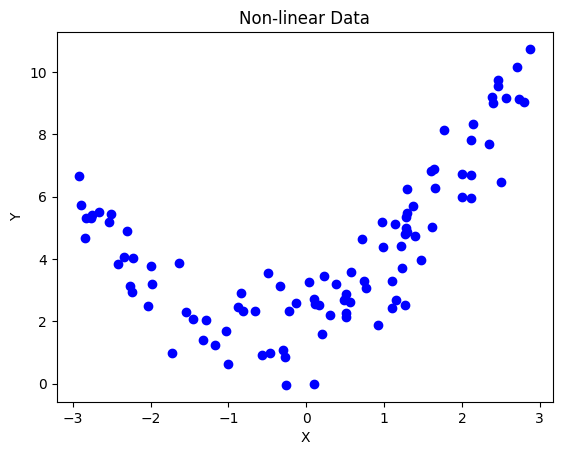

In [4]:
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Non-linear Data")
plt.show()


### Transform the features into polynomial features

In [5]:
# Set the degree of the polynomial
degree = 2
poly_features = PolynomialFeatures(degree=degree, include_bias=False) # include_bias is often set to False when using LinearRegression, as it handles the intercept by default
X_poly = poly_features.fit_transform(X)


### Split data into training and testing sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


###  Train the linear regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


###  Make predictions

In [8]:
y_pred = model.predict(X_test)


### Evaluate the model

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 0.9099589682674118
R-squared (R2): 0.8790507480049646


### Visualize the results

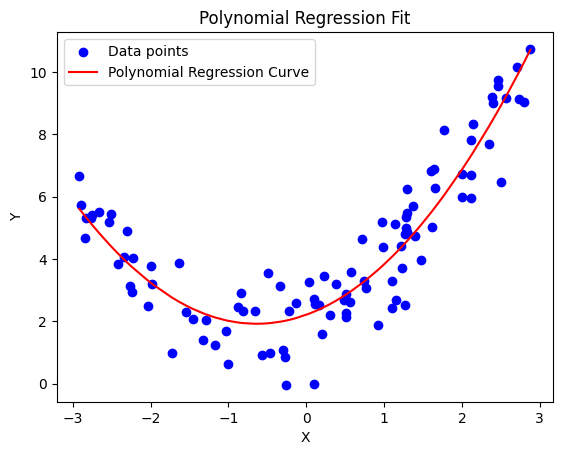

In [10]:
# Sort X for a smooth plot
X_sorted = np.sort(X, axis=0)
X_poly_sorted = poly_features.transform(X_sorted)
y_pred_sorted = model.predict(X_poly_sorted)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Regression Curve')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression Fit")
plt.legend()
plt.show()
